In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import warnings
warnings.filterwarnings('ignore')

#from lib_peip import *
from lib_geos import *

# Example 3.2
# from Parameter Estimation and Inverse Problems, 2nd edition, 2013
# by R. Aster, B. Borchers, C. Thurber
# coded by Yuan Tian @UAF 202203
#
# Matlab code:
# https://github.com/brianborchers/PEIP/blob/master/Examples/chap3/ex_3_2/ex_3_2.m
#
# CARL NOTE: The use of ndata/nparm and ndatad/nparmd is unfortunate.
#            Maybe this can be fixed for future versions of the PEIP book code.

In [2]:
# Set constants
# The noise variance
noise = 0.05

# number of data and model parameters
ndata = 210
nparm = ndata

# Discretizing values for nparm and ndata (210 data points)
ndatad = ndata+1
nparmd = nparm+1

Instrument response to unit ground acceleration impulse (fig. 2)


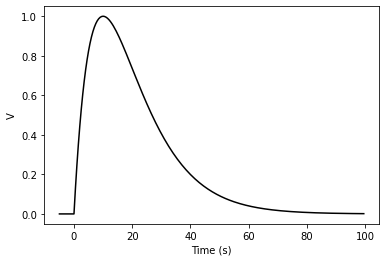

In [17]:
# Generate time vector
t = np.linspace(-5,100,nparmd)

# Generate instrument impulse response as a critically-damped pulse
# note: this is for plotting purposes only (only sigi and gmax are used)
sigi = 10

g = np.zeros(nparm)
for i in range(nparm):
    if (t[i] >= 0):
        g[i] = t[i]*np.exp(-t[i]/sigi)

# Normalize instrument response (i.e. max(g) = 1)
g = np.array(g)
gmax = np.max(g)    # 3.6788
g = g/gmax

# Plot of instrument response to unit area ground acceleration impulse.
plt.figure(2)
plt.plot(t[:nparm],g,'k')
plt.axis('tight')
plt.xlabel('Time (s)')
plt.ylabel('V')
print('Instrument response to unit ground acceleration impulse (fig. 2)')
#print -deps2 c3fimp_resp.eps

In [19]:
# Populate G matrix 
# First the numerator which varies
G = np.zeros((ndata,nparm))
for i in range(1,ndatad):
    for j in range(nparm):
        tp = t[j]-t[i]
        if (tp > 0):
            G[i-1,j] = 0
        else:
            G[i-1,j] = -tp*np.exp(tp/sigi)

# now divide everything by the denominator
deltat =  t[1]-t[0]
G = G/gmax * deltat

Displaying image of G matrix (fig. 1)


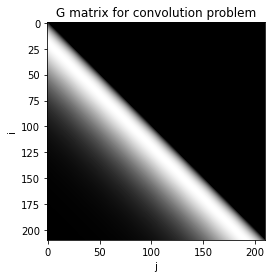

In [5]:
# Get SVD of G matrix
[U,S,V] = svdmat(G)
#[U, s, VH] = np.linalg.svd(G) 
#S=scipy.linalg.diagsvd(s,*G.shape)                  # vector of singular values
#V=VH.T

# Display image of G matrix with colorbar
plt.figure(1)
plt.imshow(G,cmap='gray')
plt.colorbar
plt.xlabel('j')
plt.ylabel('i')
plt.title('G matrix for convolution problem')
print('Displaying image of G matrix (fig. 1)')

In [ ]:
# True signal is two pulses of sig deviation
sig = 2
# Find unscaled true signal model  
mtrue = np.exp(-(t[:nparm]-8)**2/(sig**2*2)).T + 0.5*np.exp(-(t[:nparm]-25)**2/(sig**2*2)).T
# Rescale true signal model to have a max of 1
mtrue = mtrue/np.max(mtrue)
# Get true data without noise
d = G@mtrue.reshape((len(mtrue),1))
# Add random normal noise to the data
dn = G@mtrue.reshape((len(mtrue),1)) + noise*np.random.randn(ndata,1)

Displaying semilog plot of singular values (fig. 3)
Displaying true model (fig. 4)


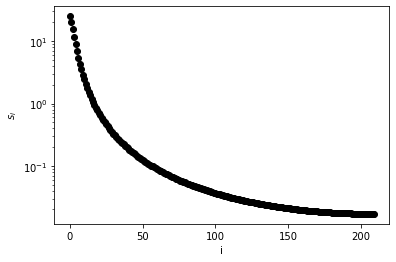

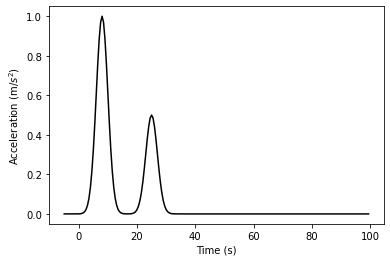

In [6]:
# Using SVD with all 210 singular values
nkeep = nparm
# Find Up, Vp, Sp
Up = U[:,:nkeep]
Vp = V[:,:nkeep]
Sp = S[:nkeep,:nkeep]

# Generalized inverse solutions for noisy data (mn) 
# and noise-free data (mperf)
Sinv = la.inv(Sp)
mn    = Vp@Sinv@Up.T @ dn
mperf = Vp@Sinv@Up.T @ d

# Display semilog plot of singular values
plt.figure(3)
plt.semilogy(np.diag(S),'ko')
plt.axis('tight')
plt.xlabel('i')
plt.ylabel(r'$s_i$')
print('Displaying semilog plot of singular values (fig. 3)')

# Plot true model
plt.figure(4)
plt.plot(t[:nparm],mtrue,'k')
plt.xlim([-5,100])
plt.ylim([0,1])
plt.axis('tight') 
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/$s^2$)')
print('Displaying true model (fig. 4)')
#print -deps2 c3fm_true.eps

Displaying predicted data from true model (without noise) (fig. 5)


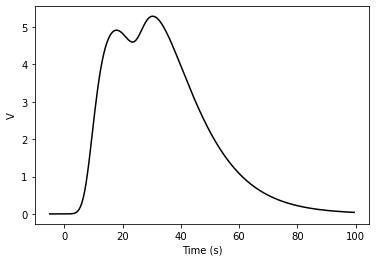

In [7]:
# Display predicted data using noise free model
plt.figure(5)
plt.plot(t[:nparm],d,'k')
plt.xlabel('Time (s)')
plt.ylabel('V')
plt.axis('tight')
print('Displaying predicted data from true model (without noise) (fig. 5)')

Displaying predicted data from true model plus independent noise (fig. 6)


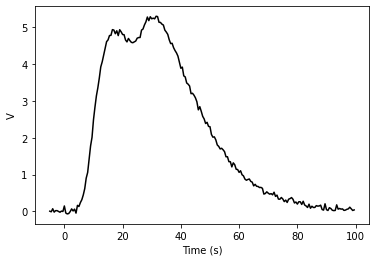

In [8]:
# Display predicted data plus random independent noise
plt.figure(6)
plt.plot(t[:nparm],dn,'k')
plt.xlim([-5,100])
plt.xlabel('Time (s)')
plt.ylabel('V')
plt.axis('tight')
print('Displaying predicted data from true model plus independent noise (fig. 6)')

Displaying generalized inverse solution for noise-free data (210 singular values) (fig. 7)


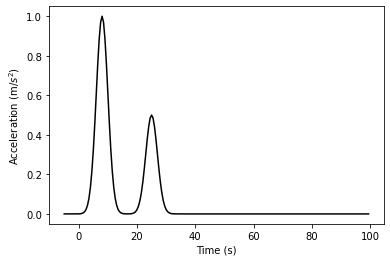

In [9]:
# Display generalized inverse solution for noise-free data
plt.figure(7)
plt.plot(t[:nparm],mperf,'k')
plt.xlim([-5,100])
plt.ylim([0,1])
plt.xlabel('Time (s)')
plt.axis('tight')
plt.ylabel('Acceleration (m/$s^2$)')
print('Displaying generalized inverse solution for noise-free data (210 singular values) (fig. 7)')

Displaying generalized inverse solution for noisy data (210 singular values) (fig. 8)


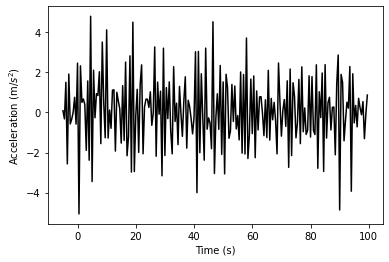

In [10]:
plt.figure(8)
plt.plot(t[:nparm],mn,'k')
plt.xlabel('Time (s)')
plt.axis('tight')
plt.ylabel('Acceleration (m/$s^2$)')
print('Displaying generalized inverse solution for noisy data (210 singular values) (fig. 8)')

Displaying generalized inverse solution for noisy data (26 singular values) (fig. 9)


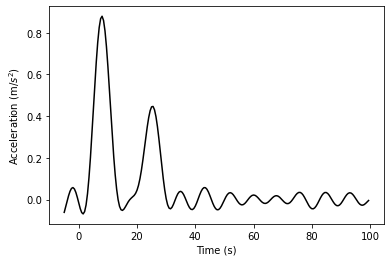

In [11]:
# Truncate SVD to 26 singular values
nkeep = 26
Up = U[:,:nkeep]
Vp = V[:,:nkeep]
Sp = S[:nkeep,:nkeep]

# Get model for truncated SVD (m2) with noisy data
Sinv = la.inv(Sp)
m2 = Vp@Sinv@Up.T@dn

# Display generalized inverse solution for noisy data
plt.figure(9)
plt.plot(t[:nparm],m2,'k')
plt.xlabel('Time (s)')
plt.axis('tight')
plt.ylabel('Acceleration (m/$s^2$)')
print('Displaying generalized inverse solution for noisy data (26 singular values) (fig. 9)')

Displaying image of resolution matrix for truncated SVD solution (26 singular values) (fig. 10)


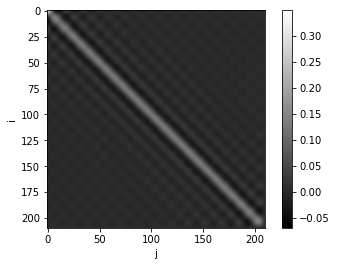

In [12]:
# Get resolution matrix
Rm = Vp@Vp.T
# Display image of resolution matrix for truncated solution with colorbar
plt.figure(10)

# use tight bounds on the colorbar instead of automatically expanded bounds
plt.imshow(Rm,cmap='gray')
plt.xlabel('j')
plt.ylabel('i')
plt.colorbar()
print('Displaying image of resolution matrix for truncated SVD solution (26 singular values) (fig. 10)')

['Displaying column of model resolution matrix for truncated SVD solution (fig. 11)']


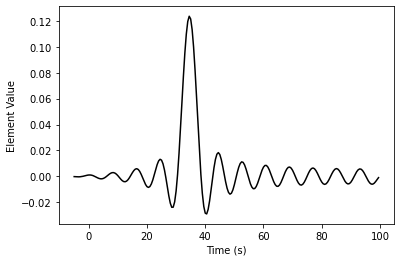

In [13]:
plt.figure(11)
plt.plot(t[:nparm], Rm[79,:],'k')
plt.xlabel('Time (s)')
plt.axis('tight')
plt.ylabel('Element Value')
print(['Displaying column of model resolution matrix for truncated SVD solution (fig. 11)'])

Animating TSVD solutions as p increases (fig. 12) [THIS MAY TAKE AWHILE]


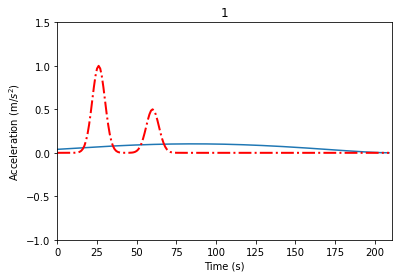

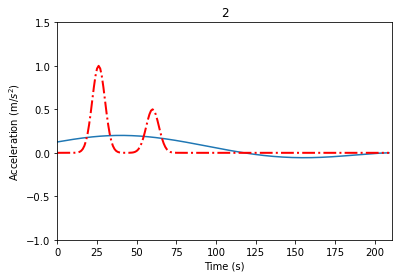

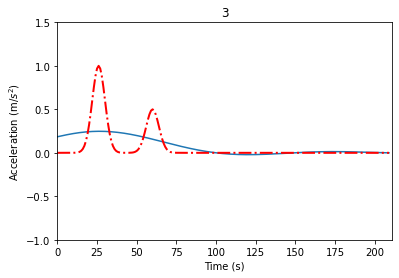

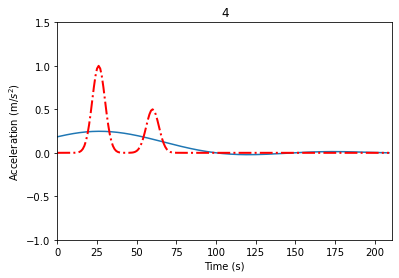

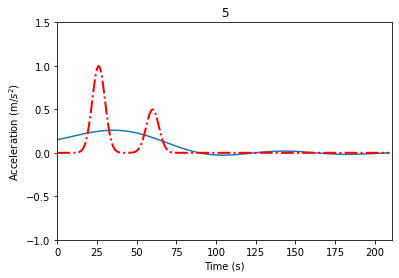

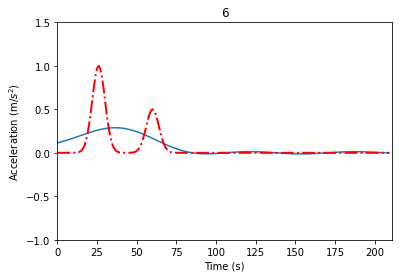

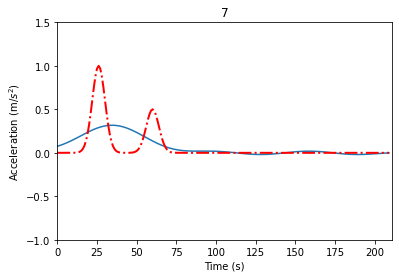

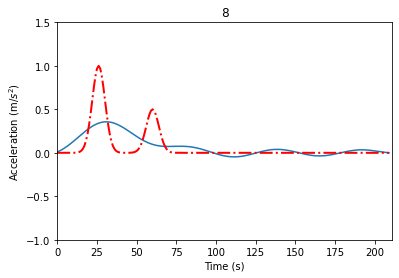

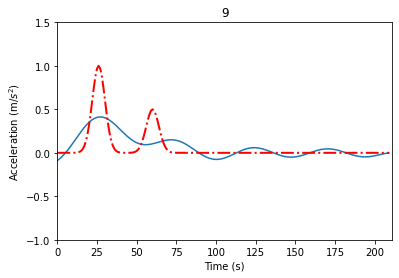

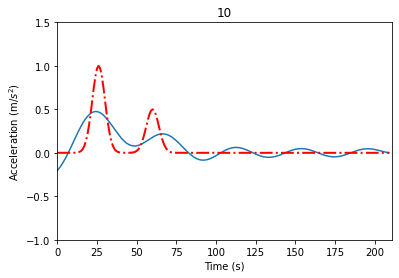

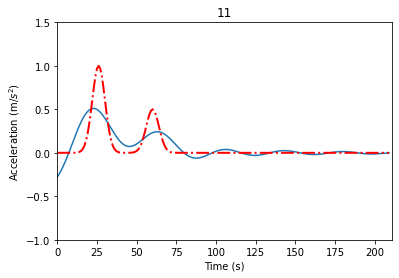

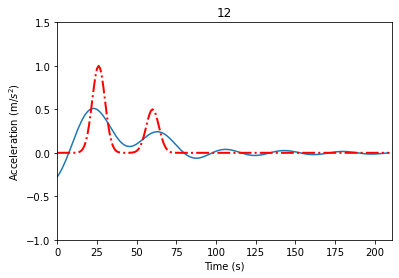

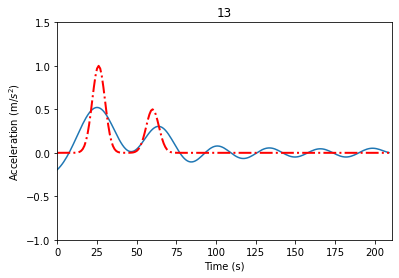

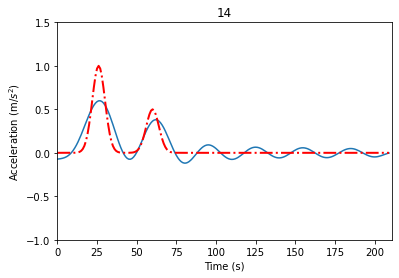

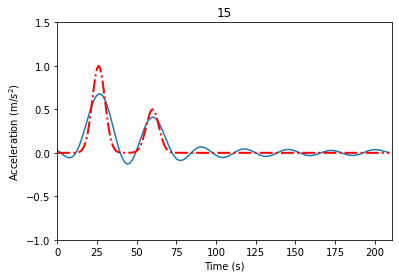

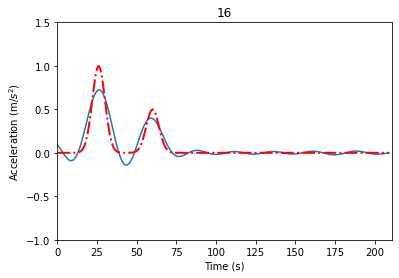

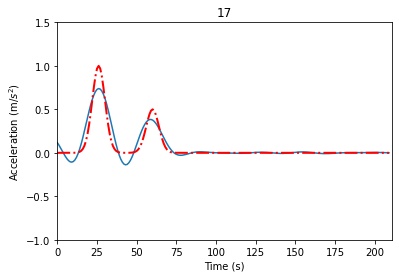

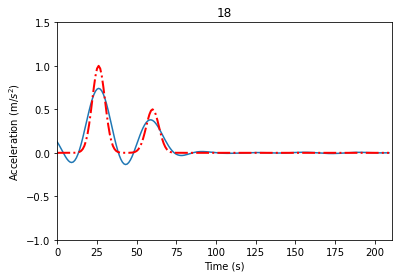

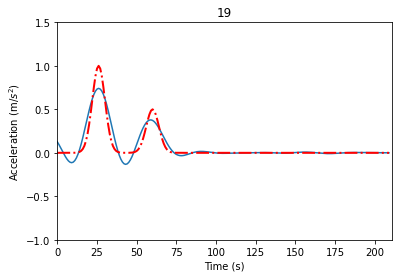

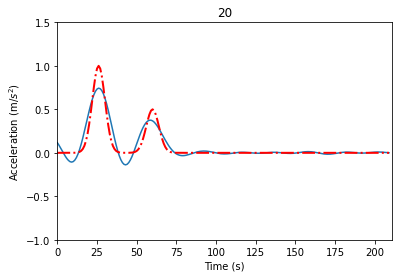

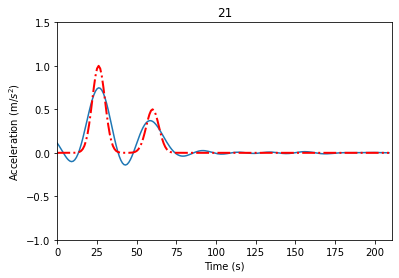

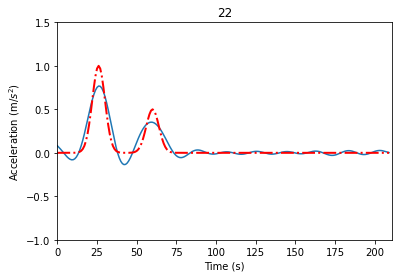

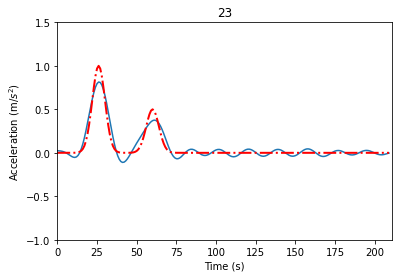

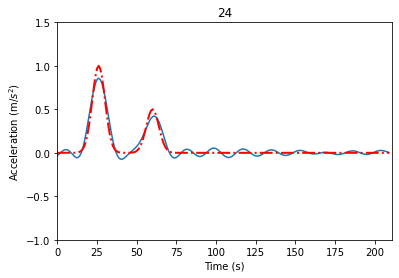

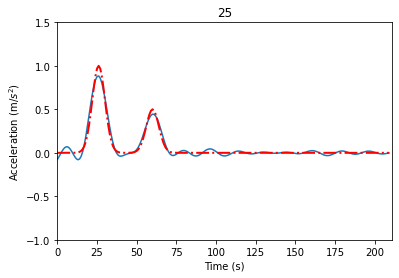

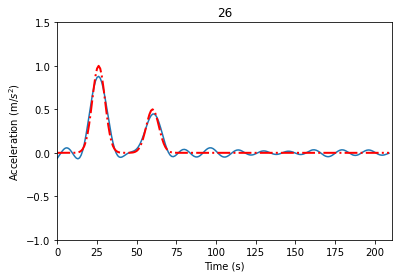

In [22]:
#show successive TSVD solutions
print('Animating TSVD solutions as p increases (fig. 12) [THIS MAY TAKE AWHILE]')

# the maximum p to use, the fit model and the diagonal elements
p = np.linalg.matrix_rank(G)
m = np.zeros((nparm,1))
ss = np.diag(S)
r = []
mnorm = []
plt.figure(12)
for i in range(p):
#for i in range(0,26):
    # adjust the predicted model to have p singular values
    m = m + (U[:,i].T@dn/ss[i])*V[:,i].reshape((nparm,1))
    # keep track of the residuals for each p
    r.append(np.linalg.norm(G@m-dn))
    # keep track of the model norm for each p
    mnorm.append(np.linalg.norm(m))
    
    # plot the newly fit model
    plt.cla()
    plt.plot(m)
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/$s^2$)')
    plt.axis([0,p+1,-1,1.5])
    # plot the true model
    plt.plot(mtrue,'r-.',lw=2)
    plt.title(i+1)
    #plt.draw()
    plt.pause(0.1)

Displaying TSVD trade-off curve (fig. 13)


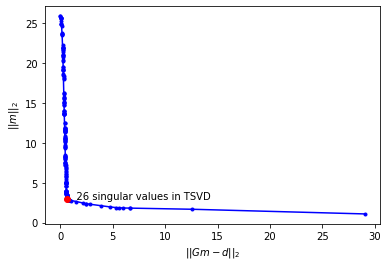

In [15]:
#Examine the trade-off curve (collected in the loop above)
# (The L curve is introduced in Chapter 4.)
plt.figure(13)
plt.plot(r,mnorm,'b.-')
plt.plot(r[25],mnorm[25],'ro')
plt.ylabel(r'$||m||_2$')
plt.xlabel(r'$||Gm-d||_2$')
plt.text(r[25],mnorm[25],'   26 singular values in TSVD')
print('Displaying TSVD trade-off curve (fig. 13)')